# Домашня робота №7

# Перетворення випадкових величин

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Квантильне перетворення

### 1.1 Задана щільність

Нехай випадкова величина $\xi$ має щільність
$f(x) = a \sin(x) I_{[0, \pi]}(x),$
де $I_{[c, d]}(x)$ - індикатор на відрізку $[c, d]$.

Знайдіть значення параметра $a$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

In [14]:
from scipy.stats import uniform
import sympy as sp

x = sp.Symbol('x')
f = sp.Function('f')(x)
f = sp.sin(x)
a = 1/sp.integrate(f,(x,0,sp.pi))
sp.pprint(a)

1/2


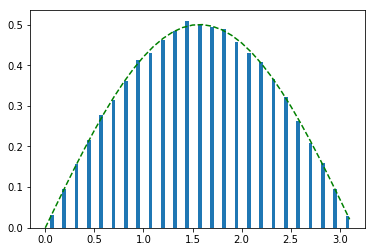

In [22]:

def invFunc(y):
    return np.arccos(1 - 2*y)


dist = uniform(0, 1)    
random = invFunc(dist.rvs(100_000))

X = np.arange(0, np.pi, 0.1)
plt.hist(random, density=True, bins=25, rwidth=0.3)
Y = a * np.sin(x);
plt.plot(X, Y , 'g--')
plt.show()



### 1.2 Нормальний розподіл

Нехай випадкова величина $\xi \sim N(0, 1)$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

[ 1.21227933  1.15247034 -0.04337759 ... -0.66743876  0.41266857
  2.43532169]


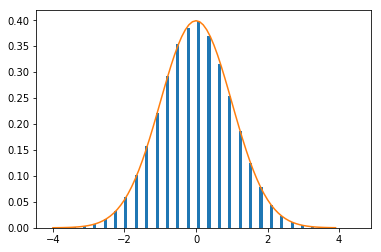

In [33]:
from scipy.stats import norm
from random import choice

dist = uniform(0, 1)

rand = norm.ppf(dist.rvs(100_000))

X = np.arange(-4, 4, 0.1)
Y =norm.pdf(x)
print(random)
plt.hist(random, density=True, bins=30, rwidth=0.3)
plt.plot(X,Y)
plt.show()



## 2 Відсутність пам'яті

Розглянемо випадкову величину $\xi$ з геометричного розподілу з параметром $p = 0.5$.
Тобто $\xi \sim Geom(0.5)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію ймовірностей випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = (\xi - 1) I_{(\xi - 1) > 0}$;
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих значень випадкової величини $\eta$;
   - функцію ймовірностей випадкової величини $\xi$.

**Зауваження 1.** Графік функції ймовірнстей краще малювати для $10$ значень.

**Зауваження 2.** У гістограмах проміжок значень слід розбивати на одиничні інтервали.

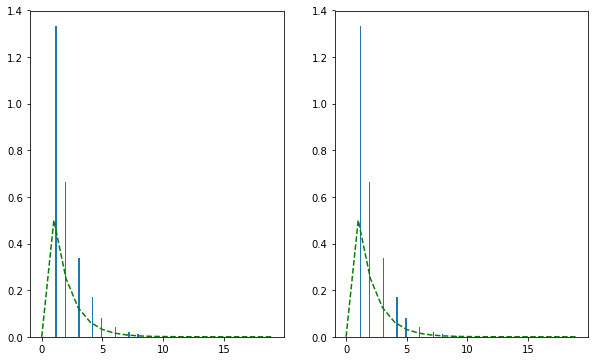

In [43]:
#### from scipy.stats import geom
from scipy.stats import geom
dist = geom(0.5)

def func(x):
    res = x - 1
    if getattr(res, '__iter__', None) is not None:
        for i, el in enumerate(res):
            if el < 0:
                res[i] = 0
    else:
        res = 0 if res < 0 else res
    return res


random = dist.rvs(100_000)
x = np.arange(0, 20, 1)

fig, axs = plt.subplots(1, 2, figsize=(10, 6))
axs[0].hist(random, bins=40, density=True, rwidth=0.3)
axs[0].plot(x, dist.pmf(x), 'g--')

eta_random = func(random)
axs[1].hist(random, bins=40, density=True, rwidth=0.3)
axs[1].plot(x, dist.pmf(x), 'g--')



## 3 Задача 1.11.3

Розглянемо випадкову величину $\xi$ зі стандартного експоненційного розподілу.
Тобто $\xi \sim Exp(1)$.

### 3.1 Експонента

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \exp\{-\xi\}$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

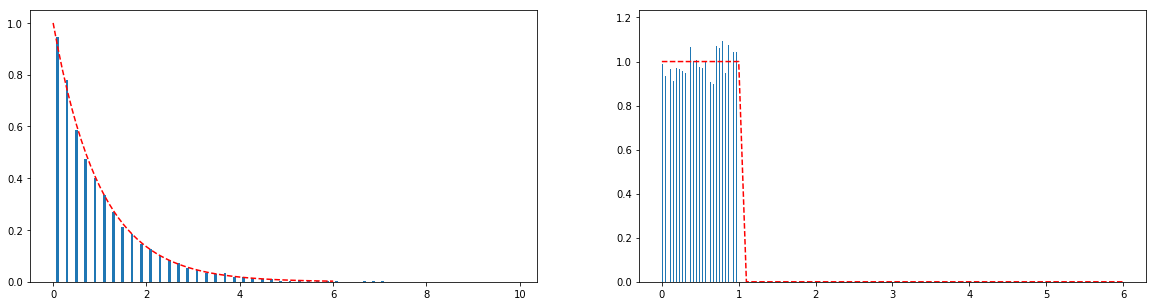

In [53]:
from scipy.stats import expon
xi = expon.rvs(size=10000)

X = np.arange(0, 6.1, 0.1)

plt.figure(figsize=(20, 5))

plt.subplot(121)
plt.hist(xi, density=True, bins=50, rwidth=0.3)
Y = expon.pdf(X)
plt.plot(X, Y, 'r--')

plt.subplot(122)
plt.hist(expon.pdf(xi), density=True, bins=50, rwidth=0.3)
Y = uniform.pdf(X)
plt.plot(X, Y, 'r--')


plt.show()



### 3.2 Квадрат

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \xi^2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

/Users/ivanmilaev/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


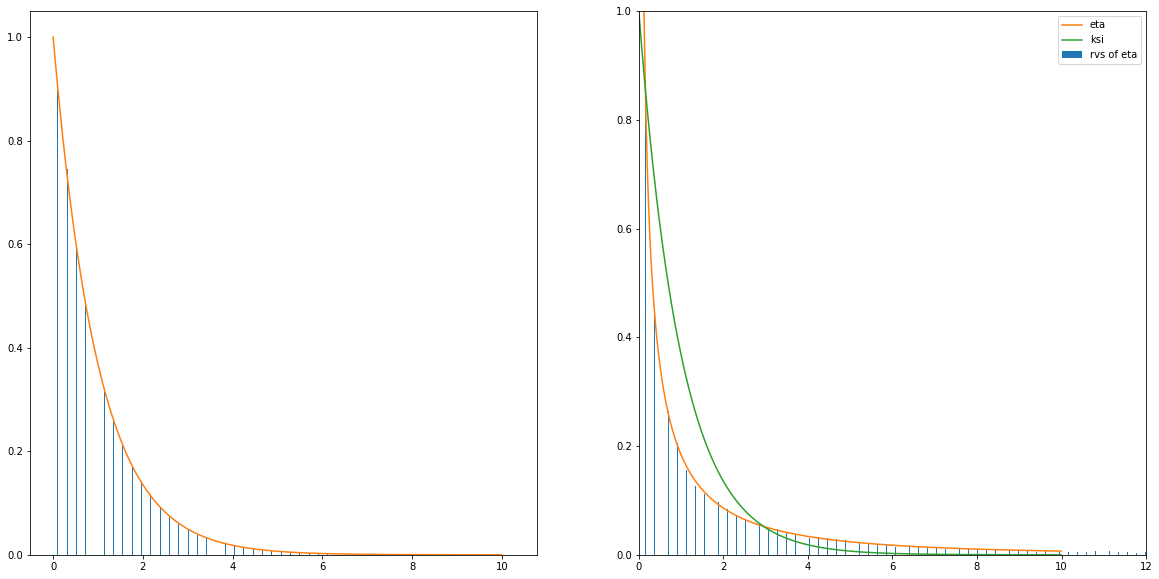

In [62]:
# Місце для Вашого коду
rvs = expon.rvs(0, size=100000)
x = np.arange(0, 10, 0.01)

fig, axs = plt.subplots(1, 2,figsize=[20,10])
axs[0].hist(rvs, bins=50, density=True, rwidth=0.1)
axs[0].plot(x, expon(0).pdf(x))


eta = lambda x: (np.exp(-np.sqrt(x)))/(2*np.sqrt(x))


axs[1].hist(rvs**2, bins=1000, density=True, label="rvs of eta", rwidth=0.1)
axs[1].plot(x, eta(x), label = "eta")
axs[1].plot(x, expon(0).pdf(x), label = "ksi")
axs[1].set_xlim([0,12])
axs[1].set_ylim([0,1])
plt.legend()
plt.show()

## 4 Задача 1.11.5

Розглянемо випадкову величину $\xi$ зі стандартного рівномірного розподілу.
Тобто $\xi \sim Unif(0, 1)$.

### 4.1 Лінійне перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = 3 \xi - 2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

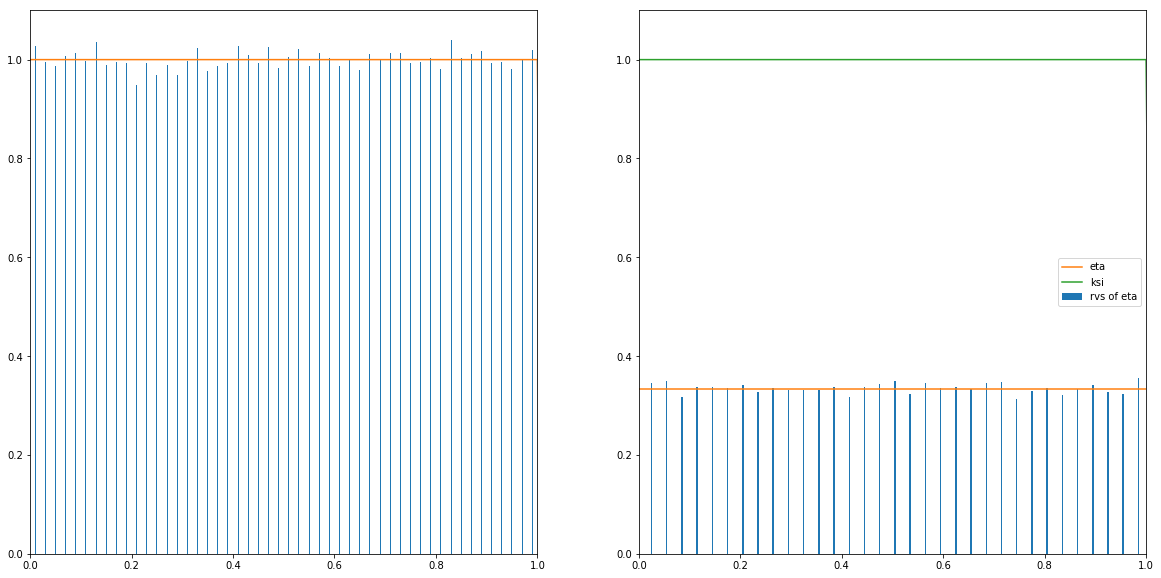

In [64]:
# Місце для Вашого коду
from scipy.stats import uniform

rvs = uniform.rvs(0,1, size=100000)
x = np.arange(0, 10, 0.01)

fig, axs = plt.subplots(1, 2,figsize=[20,10])
axs[0].hist(rvs, bins=50, density=True, rwidth=0.1)
axs[0].plot(x, uniform(0).pdf(x))
axs[0].set_xlim([0,1])
axs[0].set_ylim([0,1.1])


eta = lambda x: 1/3


axs[1].hist(rvs*3-2, bins=100, density=True, label="rvs of eta", rwidth=0.1)
axs[1].plot(x, list(map(eta,x)), label = "eta")
axs[1].plot(x, uniform(0,1).pdf(x), label = "ksi")
axs[1].set_xlim([0,1])
axs[1].set_ylim([0,1.1])
plt.legend()
plt.show()


### 4.2 Модуль від лінійного перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = |2 \xi - 1|$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

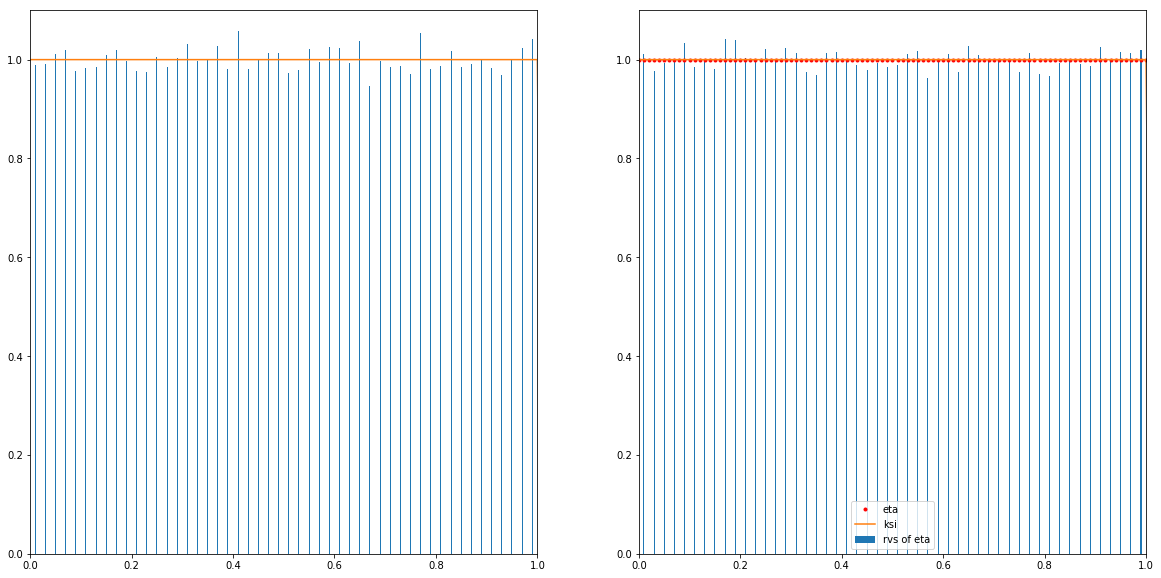

In [66]:
# Місце для Вашого коду
from scipy.stats import uniform

rvs = uniform.rvs(0,1, size=100000)
x = np.arange(0, 10, 0.01)

fig, axs = plt.subplots(1, 2,figsize=[20,10])
axs[0].hist(rvs, bins=50, density=True, rwidth=0.1)
axs[0].plot(x, uniform(0).pdf(x))
axs[0].set_xlim([0,1])
axs[0].set_ylim([0,1.1])


eta = lambda x: 1


axs[1].hist(abs(rvs*2-1), bins=50, density=True, label="rvs of eta", rwidth=0.1)
axs[1].plot(x, list(map(eta,x)),"r.", label = "eta")
axs[1].plot(x, uniform(0,1).pdf(x), label = "ksi")
axs[1].set_xlim([0,1])
axs[1].set_ylim([0,1.1])
plt.legend()
plt.show()


### 4.3 Логарифм

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = - \log \xi$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

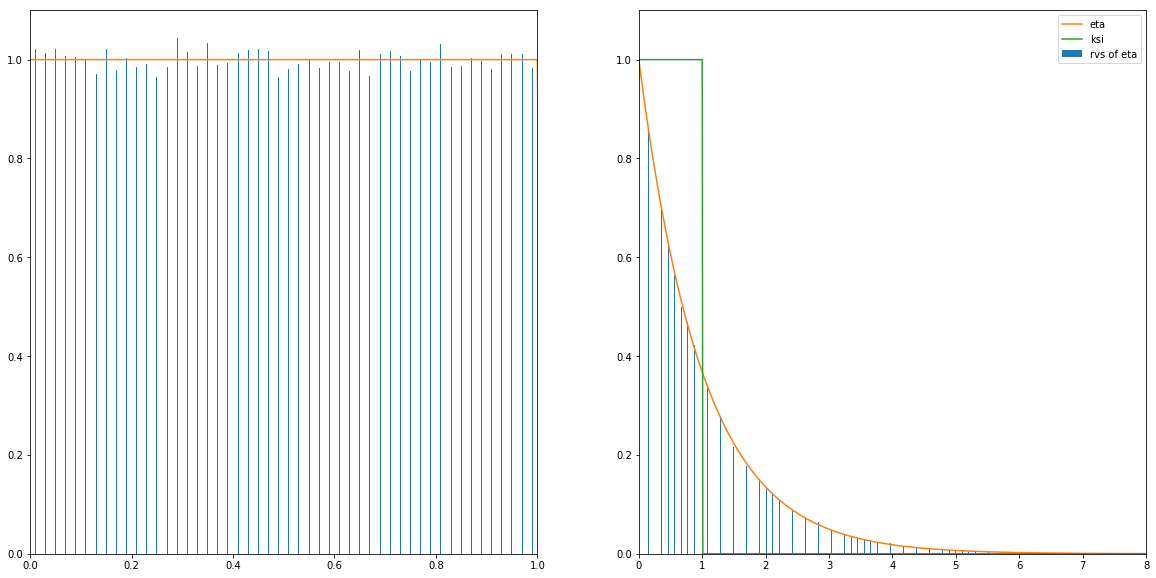

In [67]:
# Місце для Вашого коду
from scipy.stats import uniform

rvs = uniform.rvs(0,1, size=100000)
x = np.arange(0, 10, 0.01)

fig, axs = plt.subplots(1, 2,figsize=[20,10])
axs[0].hist(rvs, bins=50, density=True, rwidth=0.1)
axs[0].plot(x, uniform(0).pdf(x))
axs[0].set_xlim([0,1])
axs[0].set_ylim([0,1.1])


eta = lambda x: np.exp(-x)


axs[1].hist(-np.log(rvs), bins=100, density=True, label="rvs of eta", rwidth=0.1)
axs[1].plot(x, list(map(eta,x)), label = "eta")
axs[1].plot(x, uniform(0,1).pdf(x), label = "ksi")
axs[1].set_xlim([0,8])
axs[1].set_ylim([0,1.1])
plt.legend()
plt.show()

## 5 Одиничний квадрат

Реалізуйте вадкову величину рівномірно розподілену на одиничному квадраті.
Тобто $\xi = (x, y), \quad x, y \sim Unif(0, 1)$.

In [69]:
# Місце для Вашого коду
from scipy.stats import uniform
ksi = (uniform(0, 1), uniform(0, 1))


Знайдіть функцію щільності випадкової величини $\xi_1 = x^2 + y^2$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_1$,
отриманою перетвореннями випадкових величин $x, y$.

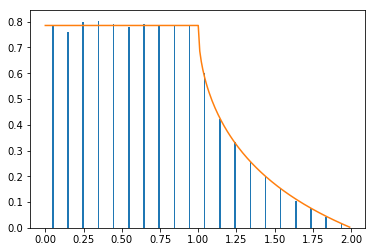

In [73]:
# Місце для Вашого коду
random = ksi[0].rvs(100000) ** 2 + ksi[1].rvs(100_000) ** 2
x = np.arange(0, 2, 0.01)

def ksi_1(x: float):
    
    res = np.pi / 4 if 0 <= x <= 1 else 0
    res += (np.pi/4 - np.arccos(1 / np.sqrt(x)) + 1 / (2 * np.sqrt(x - 1))) if 1 < x <= 2 else 0
    res -= 1 / (2 * np.sqrt(x - 1)) if 1 < x <= 2 else 0
    return res

plt.hist(random, bins=20, density=True, rwidth=0.1)
plt.plot(x, list(map(ksi_1, x)))
plt.show()

Знайдіть функцію щільності випадкової величини $\xi_2 = \max (x, y)$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_2$,
отриманою перетвореннями випадкових величин $x, y$.

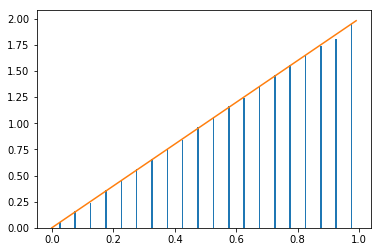

In [74]:
# Місце для Вашого коду
random = np.array([max(a, b) for a, b in zip(ksi[0].rvs(100000), ksi[1].rvs(100000))])
x = np.arange(0, 1, 0.01)

plt.hist(random, bins=20, density=True, rwidth=0.1)
plt.plot(x, 2*x)
plt.show()


Знайдіть функцію щільності випадкової величини $\xi_3 = |x - y|$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_3$,
отриманою перетвореннями випадкових величин $x, y$.

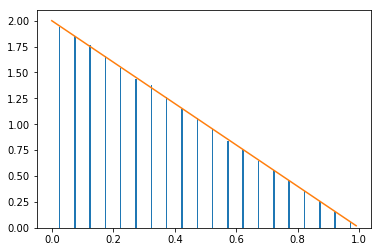

In [75]:
# Місце для Вашого коду

random = np.array([abs(a - b) for a, b in zip(ksi[0].rvs(100000), ksi[1].rvs(100000))])
x = np.arange(0, 1, 0.01)

plt.hist(random, bins=20, density=True, rwidth=0.1)
plt.plot(x, 2 - 2*x)
plt.show()